
0: 320x640 17 cars, 2 buss, 141.4ms
Speed: 9.8ms preprocess, 141.4ms inference, 12.9ms postprocess per image at shape (1, 3, 320, 640)

0: 384x640 1 person, 1 car, 2 traffic lights, 97.9ms
Speed: 3.0ms preprocess, 97.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 2 traffic lights, 62.0ms
Speed: 3.1ms preprocess, 62.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 4 cars, 1 truck, 3 traffic lights, 62.7ms
Speed: 2.7ms preprocess, 62.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


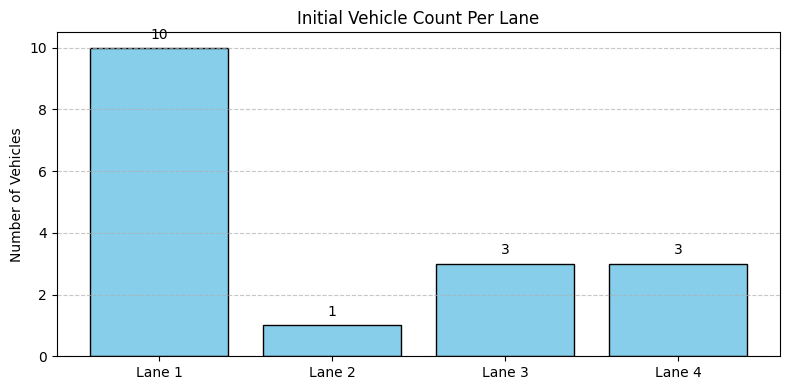


🚦 Starting Smart Traffic Light Rotation


🔁 Round 1

Lane 1 🟢 GREEN for 20 seconds (Vehicles: 10)
  Lane 1: 🟢
  Lane 2: 🔴
  Lane 3: 🔴
  Lane 4: 🔴
  ➖ 10 vehicle(s) departed from Lane 1
  Lane 1 will CLOSE after 20 seconds.

Lane 2 🟢 GREEN for 7 seconds (Vehicles: 1)
  Lane 1: 🔴
  Lane 2: 🟢
  Lane 3: 🔴
  Lane 4: 🔴
  ➖ 1 vehicle(s) departed from Lane 2
  Lane 2 will CLOSE after 7 seconds.

Lane 3 🟢 GREEN for 11 seconds (Vehicles: 3)
  Lane 1: 🔴
  Lane 2: 🔴
  Lane 3: 🟢
  Lane 4: 🔴
  ➖ 3 vehicle(s) departed from Lane 3
  Lane 3 will CLOSE after 11 seconds.

Lane 4 🟢 GREEN for 11 seconds (Vehicles: 3)
  Lane 1: 🔴
  Lane 2: 🔴
  Lane 3: 🔴
  Lane 4: 🟢
  ➖ 3 vehicle(s) departed from Lane 4
  Lane 4 will CLOSE after 11 seconds.

✅ All lanes cleared!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# COCO vehicle classes
yolo_classes = {2: "Car", 3: "Motorcycle", 5: "Bus", 7: "Truck"}

# Timing configuration
base_time = 5  # minimum green light time
extra_time_per_vehicle = 2  # extra seconds per vehicle
max_green_time = 20  # cap on green time
vehicles_per_second = 0.5  # how many vehicles can go per second

# Image paths (adjust if needed)
lane_images = [
    "C:/Users/PREETI KUMARI/OneDrive - nsut.ac.in/Desktop/chsw_project/1.webp",
    "C:/Users/PREETI KUMARI/OneDrive - nsut.ac.in/Desktop/chsw_project/train_images/00063.jpg",
    "C:/Users/PREETI KUMARI/OneDrive - nsut.ac.in/Desktop/chsw_project/train_images/00084.jpg",
    "C:/Users/PREETI KUMARI/OneDrive - nsut.ac.in/Desktop/chsw_project/train_images/02705.jpg"
]

# Detect vehicles
lane_counts = []
for idx, img_path in enumerate(lane_images):
    image = cv2.imread(img_path)
    if image is None:
        print(f"Image not found: {img_path}")
        lane_counts.append(0)
        continue

    results = model(image)[0]
    count = sum(1 for box in results.boxes
                if int(box.cls[0].item()) in yolo_classes and box.conf[0].item() > 0.5)
    lane_counts.append(count)

# Visualization of vehicle counts
def plot_vehicle_counts(counts):
    plt.figure(figsize=(8, 4))
    labels = [f"Lane {i+1}" for i in range(4)]
    plt.bar(labels, counts, color="skyblue", edgecolor="black")
    plt.title("Initial Vehicle Count Per Lane")
    plt.ylabel("Number of Vehicles")
    for i, count in enumerate(counts):
        plt.text(i, count + 0.3, str(count), ha='center')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_vehicle_counts(lane_counts)

# Fixed-rotation traffic light system
def simulate_fixed_rounds(lane_counts):
    total_lanes = len(lane_counts)
    round_number = 1

    print("\n🚦 Starting Smart Traffic Light Rotation\n")
    while any(vc > 0 for vc in lane_counts):
        print(f"\n======================\n🔁 Round {round_number}\n======================")
        for lane_idx in range(total_lanes):
            vehicles = lane_counts[lane_idx]
            if vehicles == 0:
                print(f"Lane {lane_idx+1} has no vehicles. Skipping.")
                continue

            # Dynamic green time capped at max
            dynamic_time = base_time + vehicles * extra_time_per_vehicle
            green_time = min(dynamic_time, max_green_time)

            max_depart = int(green_time * vehicles_per_second)
            departed = min(vehicles, max_depart)
            lane_counts[lane_idx] -= departed

            # Signal Output
            print(f"\nLane {lane_idx+1} 🟢 GREEN for {green_time:.0f} seconds (Vehicles: {vehicles})")
            for i in range(total_lanes):
                signal = "🟢" if i == lane_idx else "🔴"
                print(f"  Lane {i+1}: {signal}")

            print(f"  ➖ {departed} vehicle(s) departed from Lane {lane_idx+1}")
            print(f"  Lane {lane_idx+1} will CLOSE after {green_time:.0f} seconds.")

            time.sleep(1)  # use time.sleep(green_time) for real-time simulation

        round_number += 1

    print("\n✅ All lanes cleared!")

simulate_fixed_rounds(lane_counts)


In [2]:
!pip freeze > requirements.txt
